# PROJECT FAST FOOD AND PREDICT


File data description:
+ File Format: CSV
+ Columns: This dataset includes columns such as order_id, date, item_name, item_type, item_price, quantity, transaction_amount, transaction_type, received_by, and time_of_sale.
+ Data Size: 1000 rows and 10 columns.
+ Data Structure: The dataset is organized as a single CSV file, providing information on transactions at a local restaurant.
+ Data Cleaning and Preprocessing: The data has been carefully reviewed and cleaned to address duplicates and missing values, ensuring data quality for analysis.
+ Date of Last Update: The dataset was last updated on March 31, 2023.
Special Notes: Please note that the 'transaction_amount' column represents the total transaction amount, derived from the multiplication of 'item_price' and 'quantity' for each item in the order.
+ Data Source: This data was collected from a local restaurant situated near my home and is made available for analysis and educational purposes.
---



### IMPORTS

In [222]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

### DATAFRAME LOAD

In [223]:
data = pd.read_csv('FastFoodSales.csv')

In [224]:
data.head()

,order_id,date,item_name,item_type,item_price,quantity,transaction_amount,transaction_type,received_by,time_of_sale
0,1,07-03-2022,Aalopuri,Fastfood,20,13,260,NaN,Mr.,Night
1,2,8/23/2022,Vadapav,Fastfood,20,15,300,Cash,Mr.,Afternoon
2,3,11/20/2022,Vadapav,Fastfood,20,1,20,Cash,Mr.,Afternoon
3,4,02-03-2023,Sugarcane juice,Beverages,25,6,150,Online,Mr.,Night
4,5,10-02-2022,Sugarcane juice,Beverages,25,8,200,Online,Mr.,Evening


### DATA PROCESSING

In [225]:
data.shape

(1000, 10)

In [226]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            1000 non-null   int64 
 1   date                1000 non-null   object
 2   item_name           1000 non-null   object
 3   item_type           1000 non-null   object
 4   item_price          1000 non-null   int64 
 5   quantity            1000 non-null   int64 
 6   transaction_amount  1000 non-null   int64 
 7   transaction_type    893 non-null    object
 8   received_by         1000 non-null   object
 9   time_of_sale        1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 78.2+ KB


In [227]:
null_var=data.isnull().sum()/data.shape[0] *100
null_var

order_id               0.0
date                   0.0
item_name              0.0
item_type              0.0
item_price             0.0
quantity               0.0
transaction_amount     0.0
transaction_type      10.7
received_by            0.0
time_of_sale           0.0
dtype: float64

In [228]:
data.isnull().sum()

order_id                0
date                    0
item_name               0
item_type               0
item_price              0
quantity                0
transaction_amount      0
transaction_type      107
received_by             0
time_of_sale            0
dtype: int64

In [229]:
data.drop_duplicates(inplace=True)

In [230]:
data.dropna(inplace=True)

In [231]:
data.isnull().sum()

order_id              0
date                  0
item_name             0
item_type             0
item_price            0
quantity              0
transaction_amount    0
transaction_type      0
received_by           0
time_of_sale          0
dtype: int64

In [232]:
null_var=data.isnull().sum()/data.shape[0] *100
null_var

order_id              0.0
date                  0.0
item_name             0.0
item_type             0.0
item_price            0.0
quantity              0.0
transaction_amount    0.0
transaction_type      0.0
received_by           0.0
time_of_sale          0.0
dtype: float64

In [233]:
data.shape

(893, 10)

In [234]:
data.to_excel("NewDataFastFood.xlsx")

In [235]:
data = pd.read_excel("NewDataFastFood.xlsx",index_col=0)

In [236]:
data.head(5)

,order_id,date,item_name,item_type,item_price,quantity,transaction_amount,transaction_type,received_by,time_of_sale
1,2,8/23/2022,Vadapav,Fastfood,20,15,300,Cash,Mr.,Afternoon
2,3,11/20/2022,Vadapav,Fastfood,20,1,20,Cash,Mr.,Afternoon
3,4,02-03-2023,Sugarcane juice,Beverages,25,6,150,Online,Mr.,Night
4,5,10-02-2022,Sugarcane juice,Beverages,25,8,200,Online,Mr.,Evening
5,6,11/14/2022,Vadapav,Fastfood,20,10,200,Cash,Mr.,Evening


### VISUALIZATIONS

Text(0, 0.5, 'Total Amount')

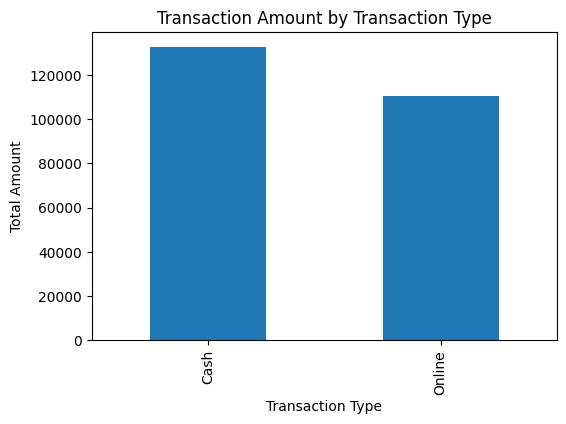

In [237]:
plt.figure(figsize=(6, 4))
transaction_type_totals = data.groupby('transaction_type')['transaction_amount'].sum()
transaction_type_totals.plot(kind='bar', title='Transaction Amount by Transaction Type')
plt.xlabel('Transaction Type')
plt.ylabel('Total Amount')

([0, 1, 2, 3, 4],
 [Text(0, 0, 'Evening'),
  Text(1, 0, 'Night'),
  Text(2, 0, 'Afternoon'),
  Text(3, 0, 'Midnight'),
  Text(4, 0, 'Morning')])

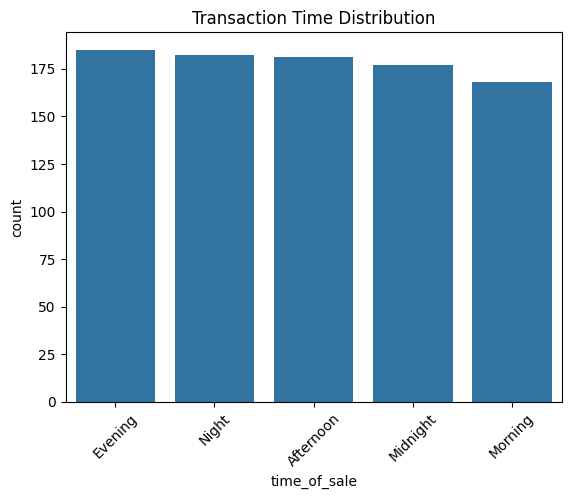

In [238]:
sns.countplot(x='time_of_sale', data=data, order=data['time_of_sale'].value_counts().index)
plt.title('Transaction Time Distribution')
plt.xticks(rotation=45)

Text(0.5, 0, 'Amount')

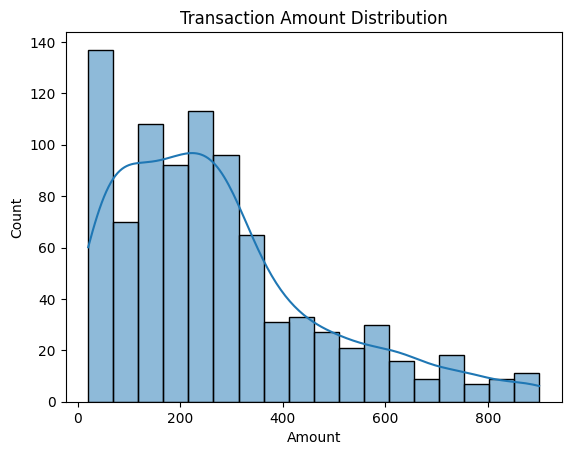

In [239]:
sns.histplot(data['transaction_amount'], kde=True)
plt.title('Transaction Amount Distribution')
plt.xlabel('Amount')

Text(0, 0.5, 'Total Quantity Sold')

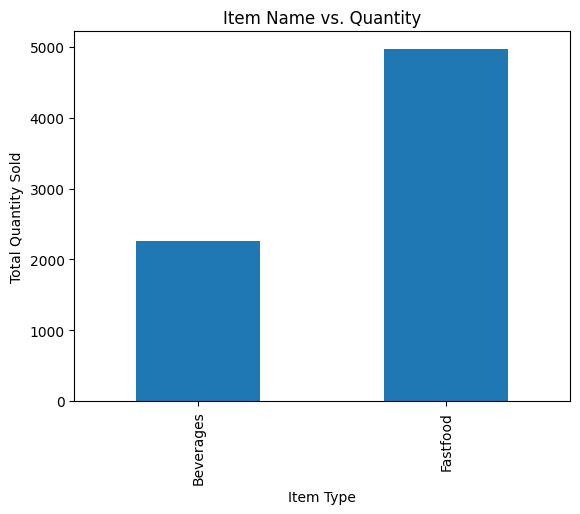

In [240]:
item_quantity = data.groupby('item_type')['quantity'].sum()
item_quantity.plot(kind='bar', title='Item Name vs. Quantity')
plt.xlabel('Item Type')
plt.ylabel('Total Quantity Sold')

In [241]:
fig = px.pie(data, names='item_type', title='Item Type Distribution')
fig.update_traces(textposition='inside', textinfo='percent+label')

In [242]:
# Visualization 6: Transaction Amount vs. Transaction Type (Plotly)
fig = px.bar(data, x='transaction_type', y='transaction_amount', title='Transaction Amount vs. Transaction Type')
fig.update_layout(xaxis_title='Transaction Type', yaxis_title='Transaction Amount')

Text(0, 0.5, 'Total Amount')

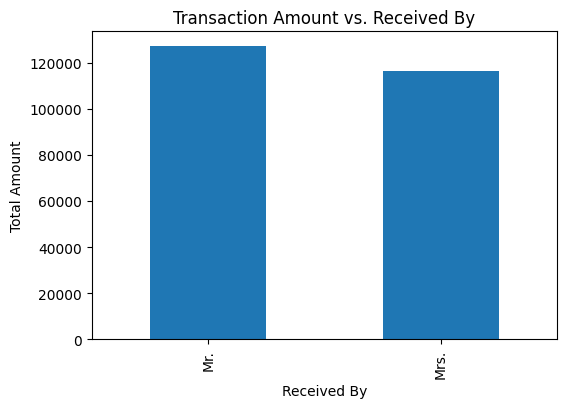

In [243]:
# Visualization 7: Transaction Amount vs. Received By (Matplotlib)
plt.figure(figsize=(6, 4))
received_by_totals = data.groupby('received_by')['transaction_amount'].sum()
received_by_totals.plot(kind='bar', title='Transaction Amount vs. Received By')
plt.xlabel('Received By')
plt.ylabel('Total Amount')

<ipython-input-244-bacfd6383bb1>:3: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




Text(0, 0.5, 'Total Quantity Sold')

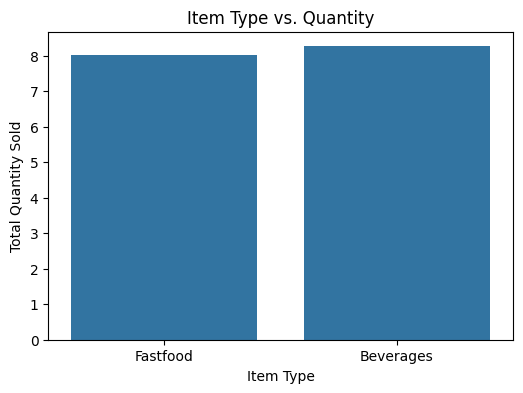

In [244]:
# Visualization 8: Item Type vs. Quantity (Seaborn)
plt.figure(figsize=(6, 4))
sns.barplot(x='item_type', y='quantity', data=data, ci=None)
plt.title('Item Type vs. Quantity')
plt.xlabel('Item Type')
plt.ylabel('Total Quantity Sold')

Text(0, 0.5, 'Transaction Amount')

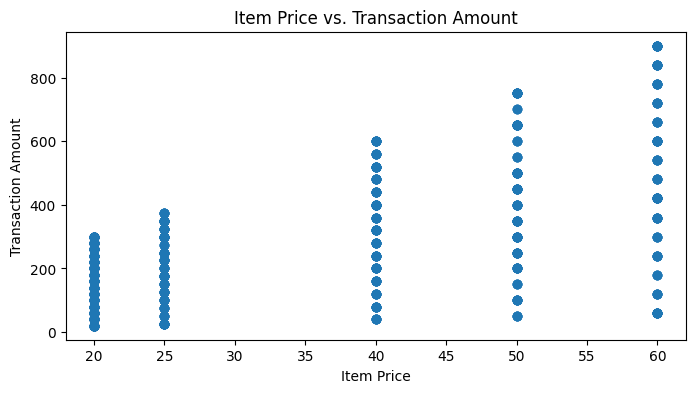

In [245]:
# Visualization 9: Item Price vs. Transaction Amount (Matplotlib)
plt.figure(figsize=(8, 4))
plt.scatter(data['item_price'], data['transaction_amount'])
plt.title('Item Price vs. Transaction Amount')
plt.xlabel('Item Price')
plt.ylabel('Transaction Amount')

Text(0.5, 0, 'Transaction Type')

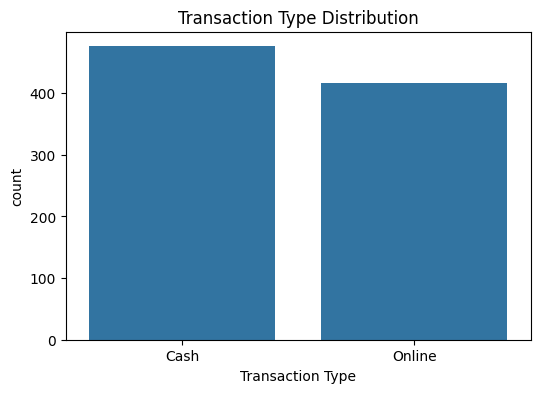

In [246]:
# Visualization 10: Transaction Type Distribution (Seaborn)
plt.figure(figsize=(6, 4))
sns.countplot(x='transaction_type', data=data, order=data['transaction_type'].value_counts().index)
plt.title('Transaction Type Distribution')
plt.xlabel('Transaction Type')

# Cleaning Data

<ipython-input-247-6b3175008bda>:5: FutureWarning:

The default value of regex will change from True to False in a future version.

<ipython-input-247-6b3175008bda>:8: UserWarning:

Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.



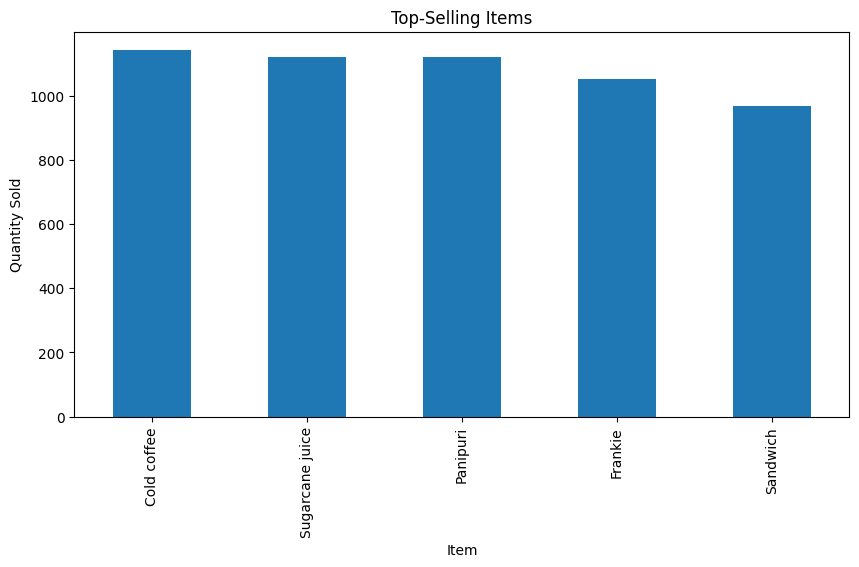

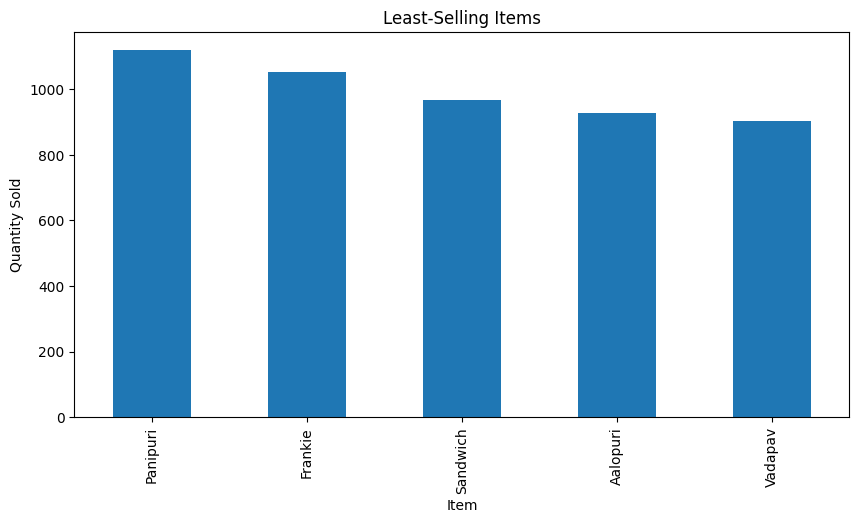

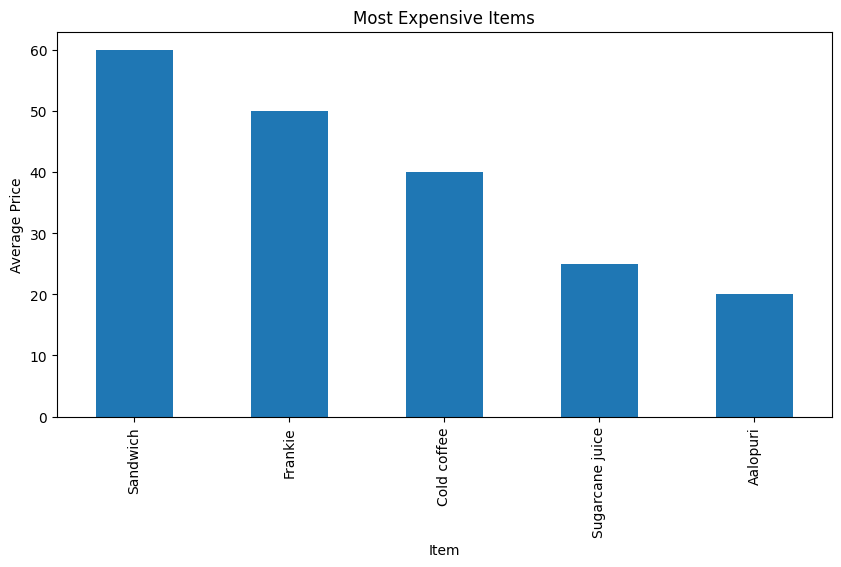

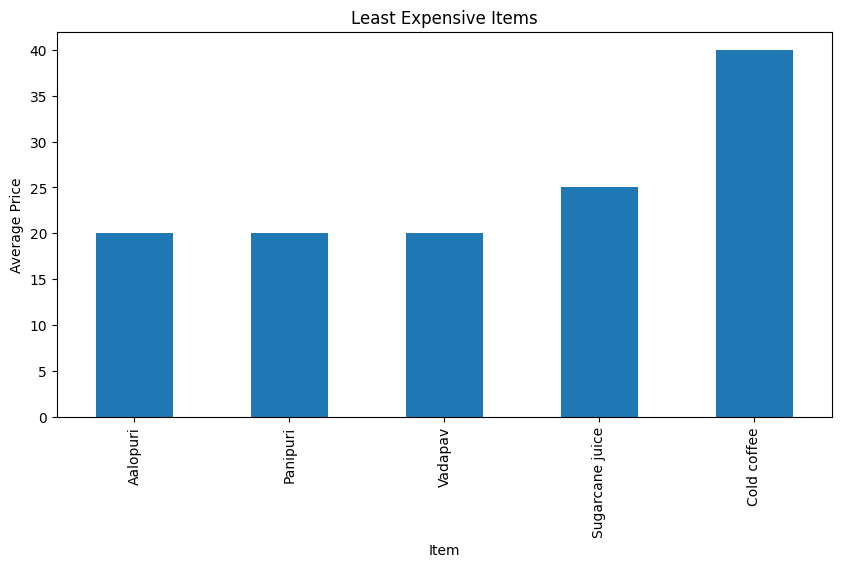

In [247]:
from datetime import datetime
# Clean the 'date' column to ensure all records have the 'mm-dd-yyyy' format
my_str = '09-24-2023'
data['date'] = data['date'].str.replace('/', '-')
data['date'] = data['date'].str.replace(r'(\d{2})-(\d{2})-(\d{4})', r'\2-\1-\3')

# Convert the 'date' column to datetime
data['date'] = pd.to_datetime(data['date'], infer_datetime_format=True)


# Top-selling items
items_sold = data.groupby('item_name')['quantity'].sum().sort_values(ascending=False)
top_items_sold = items_sold.head(5)

# Least-selling items
bottom_items_sold = items_sold.tail(5)

# Most expensive and least expensive items
average_price = data.groupby('item_name')['item_price'].mean()
top_items_price = average_price.sort_values(ascending=False).head(5)
bottom_items_price = average_price.sort_values().head(5)

# Visualization of top-selling items
plt.figure(figsize=(10, 5))
top_items_sold.plot(kind='bar')
plt.title('Top-Selling Items')
plt.xlabel('Item')
plt.ylabel('Quantity Sold')
plt.show()

# Visualization of least-selling items
plt.figure(figsize=(10, 5))
bottom_items_sold.plot(kind='bar')
plt.title('Least-Selling Items')
plt.xlabel('Item')
plt.ylabel('Quantity Sold')
plt.show()

# Visualization of most expensive items
plt.figure(figsize=(10, 5))
top_items_price.plot(kind='bar')
plt.title('Most Expensive Items')
plt.xlabel('Item')
plt.ylabel('Average Price')
plt.show()

# Visualization of least expensive items
plt.figure(figsize=(10, 5))
bottom_items_price.plot(kind='bar')
plt.title('Least Expensive Items')
plt.xlabel('Item')
plt.ylabel('Average Price')
plt.show()

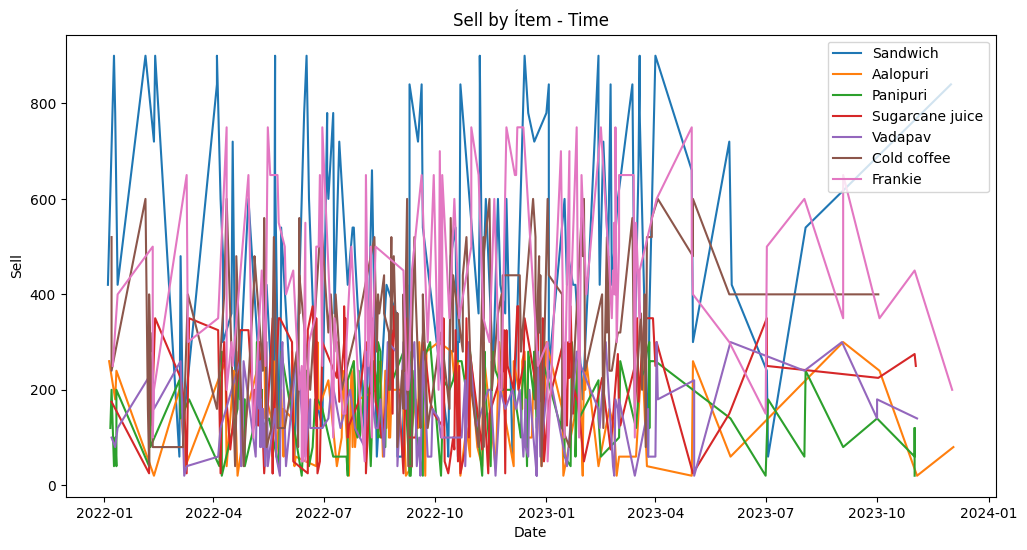

In [248]:
data['date'] = pd.to_datetime(data['date'])
data = data.sort_values('date')

plt.figure(figsize=(12, 6))
items = data['item_name'].unique()
for item in items:
    item_data = data[data['item_name'] == item]
    plt.plot(item_data['date'], item_data['transaction_amount'], label=item)

plt.title('Sell by Ítem - Time')
plt.xlabel('Date')
plt.ylabel('Sell')
plt.legend()
plt.show()

In [249]:
training_data = data.copy()

In [250]:
from sklearn.preprocessing import LabelEncoder

In [251]:
# Encoding item_name column
encoder_item_name = LabelEncoder()
training_data.item_name = encoder_item_name.fit_transform(training_data.item_name)

# Encoding item_type column
encoder_item_type = LabelEncoder()
training_data.item_type = encoder_item_type.fit_transform(training_data.item_type)

# Encoding transaction_type column
encoder_transaction_type = LabelEncoder()
training_data.transaction_type = encoder_transaction_type.fit_transform(training_data.transaction_type)

# Encoding received_by column
encoder_received_by = LabelEncoder()
training_data.received_by = encoder_received_by.fit_transform(training_data.received_by)

# Encoding time_of_sale column
encoder_time_of_sale = LabelEncoder()
training_data.time_of_sale = encoder_time_of_sale.fit_transform(training_data.time_of_sale)

# Encoding date column
encoder_date = LabelEncoder()
training_data.date = encoder_date.fit_transform(training_data.date)

In [252]:
training_data

,order_id,date,item_name,item_type,item_price,quantity,transaction_amount,transaction_type,received_by,time_of_sale
690,691,0,4,1,60,7,420,0,1,1
523,524,1,0,1,20,13,260,1,0,0
165,166,2,3,1,20,6,120,0,1,1
579,580,3,3,1,20,10,200,1,0,4
527,528,3,5,0,25,7,175,0,1,2
...,...,...,...,...,...,...,...,...,...,...
341,342,335,6,1,20,7,140,1,0,0
971,972,335,0,1,20,1,20,0,1,0
767,768,336,4,1,60,14,840,0,0,0
504,505,337,2,1,50,4,200,0,0,4


<Axes: >

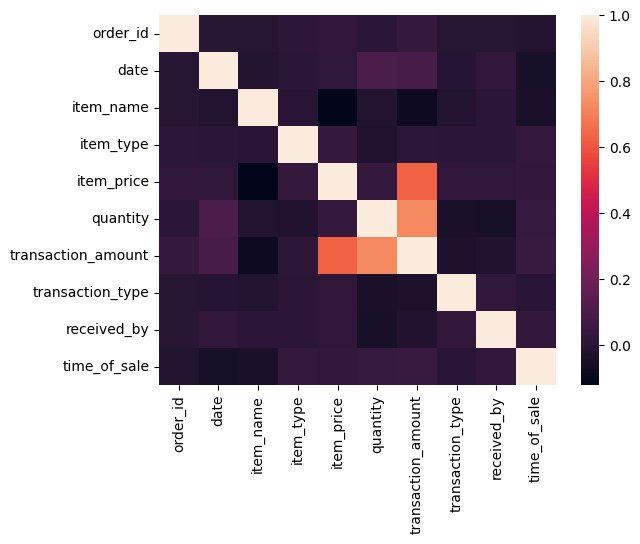

In [253]:
sns.heatmap(training_data.corr())

### Splitting Training and Test Data

In [254]:
from sklearn.model_selection import train_test_split

In [255]:
training_data.columns

Index(['order_id', 'date', 'item_name', 'item_type', 'item_price', 'quantity',
       'transaction_amount', 'transaction_type', 'received_by',
       'time_of_sale'],
      dtype='object')

In [256]:
# Independent Variales
x = training_data.drop(columns = ["transaction_amount"])
# Dependent Variable
y = training_data["transaction_amount"]
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.1,random_state=10)

In [257]:
# finding length of train and test data
[len(x) for x in [X_train, X_test, y_train, y_test]]

[803, 90, 803, 90]

### Compare with 4 models

In [258]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

In [259]:
# Linear Regression
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

LinearRegression()

In [260]:
# Random Forest Regression
random_forest_reg = RandomForestRegressor()
random_forest_reg.fit(X_train, y_train)

RandomForestRegressor()

In [261]:
# Gradient Boosting Regression
gradient_boosting_reg = GradientBoostingRegressor()
gradient_boosting_reg.fit(X_train, y_train)

GradientBoostingRegressor()

In [262]:
# Support Vector Regression
svr_reg = SVR(kernel='rbf')
svr_reg.fit(X_train, y_train)

SVR()

In [263]:
models = [linear_reg, random_forest_reg, gradient_boosting_reg, svr_reg]
for model in models:
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    print(f"Model: {model.__class__.__name__}, MSE: {mse}")

Model: LinearRegression, MSE: 4822.827383779638
Model: RandomForestRegressor, MSE: 2.74688888888888
Model: GradientBoostingRegressor, MSE: 7.400341329305069
Model: SVR, MSE: 42091.54069452428
